<a href="https://colab.research.google.com/github/pranauww/making-your-first-ml-model/blob/main/CelciusToFahrenheit_MLSN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Installing Tensorflow

In [1]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## Step 2 - Importing Libraries and Mounting Google Drive

In [2]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 3 - Loading Dataset and conducting EDA

In [4]:
temp_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Celsius+to+Fahrenheit.csv')

In [6]:
temp_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [7]:
temp_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [8]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [9]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

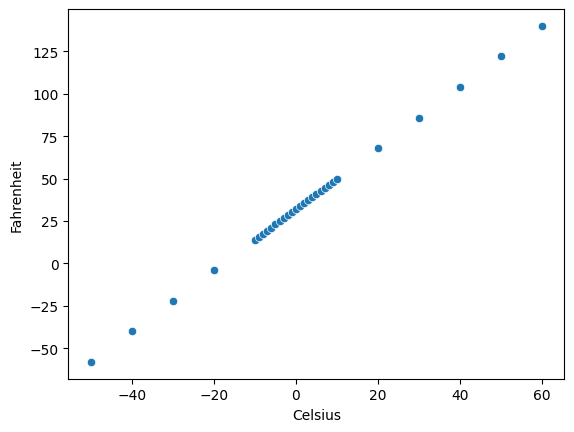

In [10]:
sns.scatterplot(data=temp_df, x="Celsius", y="Fahrenheit")

## Step 4 - Defining the Training Dataset and the Model

In [11]:
X_train = temp_df['Celsius']
Y_train = temp_df['Fahrenheit']

In [12]:
X_train.shape

(30,)

In [13]:
Y_train.shape

(30,)

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer = tf.keras.optimizers.Adam(1.0), loss = 'mean_squared_error')

## Step 5 - Training the Model

In [18]:
epochs_hist = model.fit(X_train, Y_train, epochs = 500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1598.5780
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 955.8412
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1107.5177
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1156.9712
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 954.5701
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 751.0060
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 686.4951
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 722.6049
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 730.0558
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 652.6205
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 535.4874
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 448.2624
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 421.0454
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 426.8076
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - los

## Step 6 - Counding Analysis on Training Process

In [19]:
epochs_hist.history.keys()

dict_keys(['loss'])

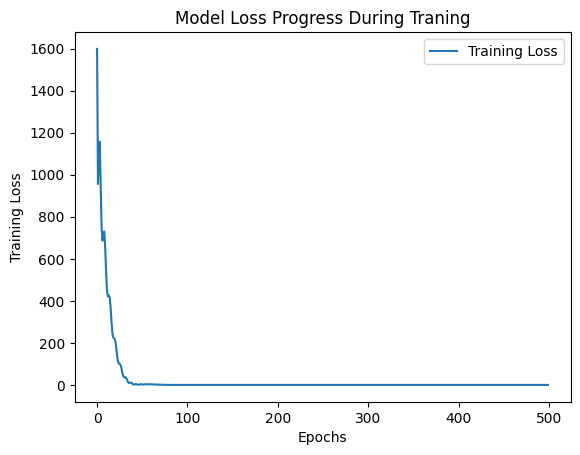

In [20]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Traning')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

## Step 7 - Confirming Results

In [21]:
model.get_weights()

[array([[1.8000001]], dtype=float32), array([32.], dtype=float32)]

In [24]:
Temp_C = 50
Temp_F = model.predict(np.array([Temp_C]))
print('Temperature in DegF Using Trained ANN = ', Temp_F)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Temperature in DegF Using Trained ANN =  [[122.]]


In [25]:
# Lets confirm the equation
Temp_F = 9/5 * Temp_C + 32
print('Temperature in DegF Using Equation = ', Temp_F)

Temperature in DegF Using Equation =  122.0
